In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('1000 Sales Records.csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


In [3]:
df.info

# Pastikan kolom numerik terbaca sebagai angka
num_cols = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors = 'coerce')

# Cek Colum yang kosong
df.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [4]:
# Total Revenue per Country (diurutkan dari yang terbesar)
top5_country_revenue = df.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False).head(5)

print("Top 5 Negara dengan Total Revenue Tertinggi")
print(top5_country_revenue)

Top 5 Negara dengan Total Revenue Tertinggi
Country
Cuba                27522085.87
Papua New Guinea    22209652.47
Ghana               21267908.50
Costa Rica          19628279.63
Iran                18719532.99
Name: Total Revenue, dtype: float64


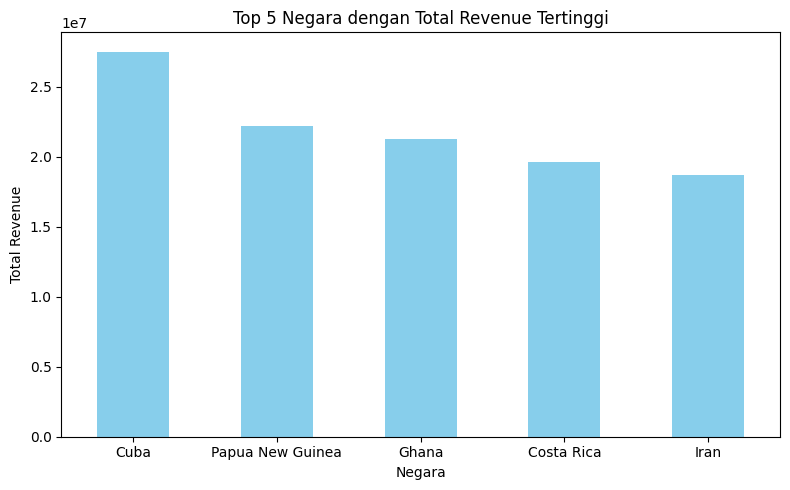

In [7]:
#Plot Bar Chart
top5_country_revenue.plot(kind='bar',color='skyblue',figsize=(8,5))

plt.title("Top 5 Negara dengan Total Revenue Tertinggi")
plt.xlabel('Negara')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
# Total Unit Sold per Item Type
units_per_item = df.groupby('Item Type')['Units Sold'].sum().sort_values(ascending= False)

print(" Total Unit Sold per Item Type")
print(units_per_item)

 Total Unit Sold per Item Type
Item Type
Beverages          504905
Personal Care      475724
Vegetables         471276
Office Supplies    444482
Baby Food          436618
Cosmetics          426072
Meat               407915
Snacks             395144
Cereal             387749
Clothes            377986
Household          370992
Fruits             355125
Name: Units Sold, dtype: int64


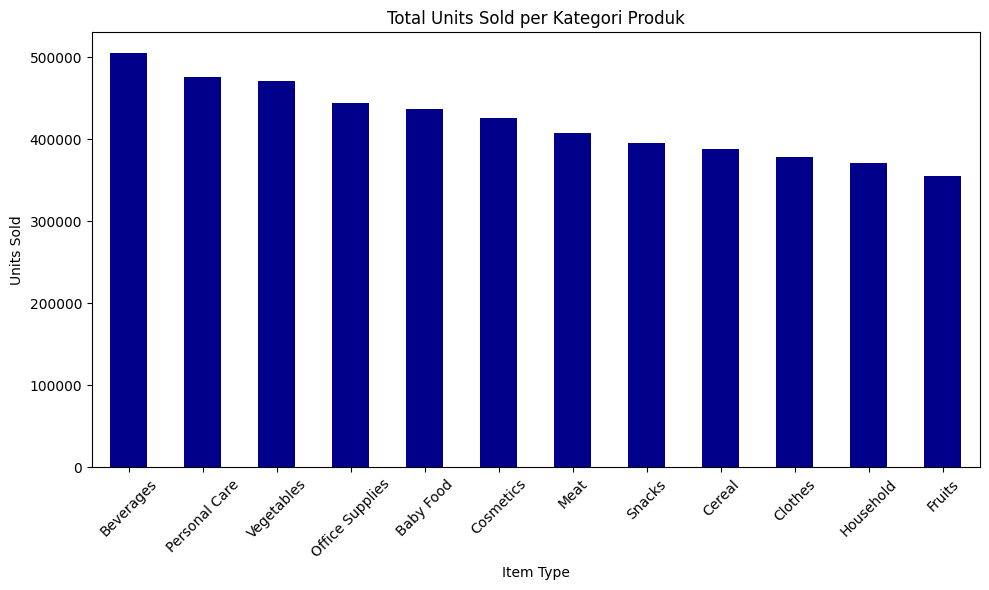

In [11]:
units_per_item.plot(kind='bar',color='darkblue',figsize=(10,6))

plt.title("Total Units Sold per Kategori Produk")
plt.xlabel('Item Type')
plt.ylabel('Units Sold')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [12]:
# Total Revenue per Region
revenue_per_region = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

print("Total Revenue per Region")
print(revenue_per_region)

Total Revenue per Region
Region
Sub-Saharan Africa                   3.567243e+08
Europe                               3.531675e+08
Middle East and North Africa         1.751065e+08
Asia                                 1.676748e+08
Central America and the Caribbean    1.439976e+08
Australia and Oceania                1.056896e+08
North America                        2.496160e+07
Name: Total Revenue, dtype: float64


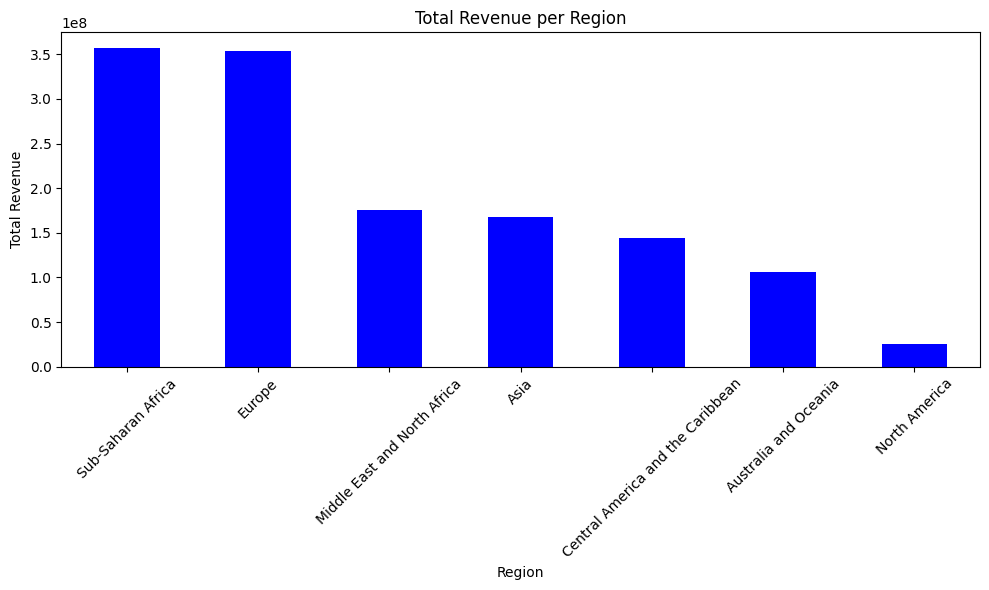

In [14]:
revenue_per_region.plot(kind='bar',color='blue',figsize=(10,6))

plt.title("Total Revenue per Region")
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

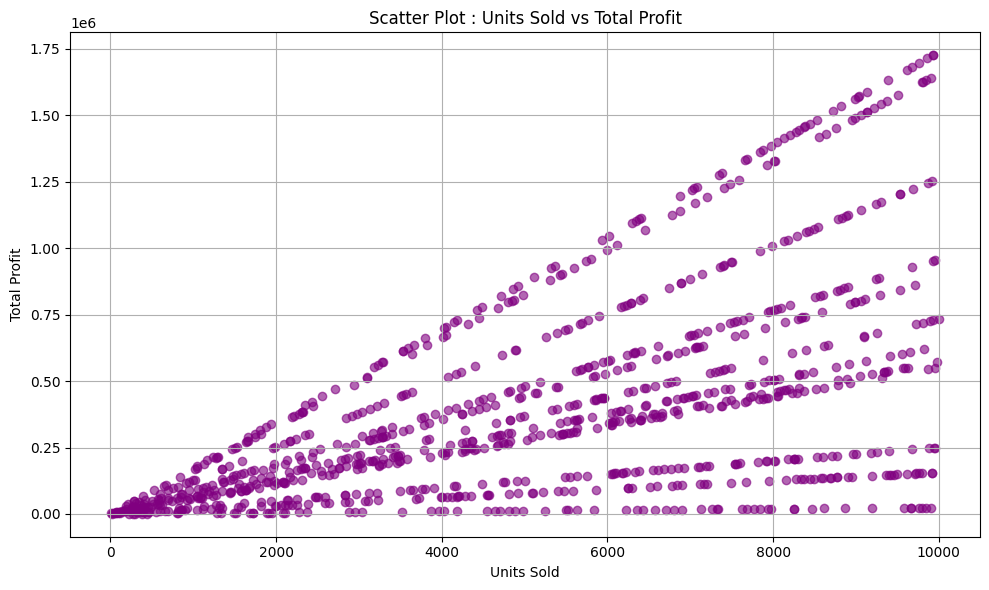

In [17]:
# Scatter plot: Units Sold vs Total Profit

plt.figure(figsize=(10,6))
plt.scatter(df['Units Sold'], df['Total Profit'], alpha=0.6, color='purple')

plt.title('Scatter Plot : Units Sold vs Total Profit')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Statistik deskriptif untuk kolom numerik
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.496813e+08,5053.988000,262.10684,184.965110,1.327322e+06,9.361192e+05,3.912026e+05
std,2.571334e+08,2901.375317,216.02106,175.289311,1.486515e+06,1.162571e+06,3.836402e+05
min,1.029280e+08,13.000000,9.33000,6.920000,2.043250e+03,1.416750e+03,5.326100e+02
25%,3.280740e+08,2420.250000,81.73000,56.670000,2.811919e+05,1.649319e+05,9.837612e+04
50%,5.566097e+08,5184.000000,154.06000,97.440000,7.549392e+05,4.647261e+05,2.772260e+05
75%,7.696945e+08,7536.750000,421.89000,263.330000,1.733503e+06,1.141750e+06,5.484568e+05
max,9.955298e+08,9998.000000,668.27000,524.960000,6.617210e+06,5.204978e+06,1.726181e+06
